## Importing libs


In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import requests
import tweepy 
import json
#from PIL import Image
from io import BytesIO

## Gathering Data
- csv file (twitter_archive_enhanced.csv)

In [217]:
df_archive = pd.read_csv('twitter_archive_enhanced.csv')


In [218]:
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


- Image predictions

In [219]:
# Download the image prediction file programmatically
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
image_request = requests.get(url, allow_redirects=True)
open('image_predictions.tsv', 'wb').write(image_request.content)
df_image = pd.read_csv('image_predictions.tsv', sep = '\t')
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


- Twitter API data

In [ ]:
#I used twitter_api.py from Udacity Supporting Materials
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

- tweet_json.txt

In [220]:
#get the data from the tweet_json.txt file and convert it to a list
df_text_list=[]
with open('tweet_json.txt',encoding='utf-8') as file:
    for item in file:
        df_text_list.append(json.loads(item))
        
df_text_list[100]

{'created_at': 'Thu Jun 08 04:17:07 +0000 2017',
 'id': 872668790621863937,
 'id_str': '872668790621863937',
 'full_text': 'RT @loganamnosis: Penelope here is doing me quite a divertir. Well done, @dog_rates! Loving the pupdate. 14/10, je jouerais de nouveau. htt…',
 'truncated': False,
 'display_text_range': [0, 140],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [{'screen_name': 'loganamnosis',
    'name': 'michael',
    'id': 154767397,
    'id_str': '154767397',
    'indices': [3, 16]},
   {'screen_name': 'dog_rates',
    'name': 'WeRateDogs™ (author)',
    'id': 4196983835,
    'id_str': '4196983835',
    'indices': [73, 83]}],
  'urls': []},
 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 4196983835,
  'id_str': '4196983835',
  'name

In [221]:
# saving the text list as a dataframe
df_text=pd.DataFrame(df_text_list,columns=['id','retweet_count','favorite_count'])
df_text.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [222]:
#changing id column name into tweet_id to be like another dataframes
df_text.rename(columns={'id':'tweet_id'},inplace=True)
df_text.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing Data

- Twitter archive DataFrame

In [223]:
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [224]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [225]:
df_archive.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [226]:
df_archive.tweet_id.duplicated().sum()

0

In [227]:
df_archive.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [228]:
df_archive[df_archive.rating_numerator<10].tweet_id

45      883482846933004288
229     848212111729840128
315     835152434251116546
387     826598799820865537
462     817502432452313088
485     814578408554463233
599     798682547630837760
605     798576900688019456
730     781661882474196992
745     780092040432480260
764     777953400541634568
765     777885040357281792
784     775096608509886464
814     771014301343748096
835     768193404517830656
845     766423258543644672
859     763183847194451968
860     763167063695355904
883     760252756032651264
896     759099523532779520
906     758041019896193024
912     757596066325864448
915     757354760399941633
936     753375668877008896
946     752568224206688256
948     752334515931054080
956     751583847268179968
964     750506206503038976
966     750383411068534784
987     749036806121881602
               ...        
2312    666776908487630848
2314    666701168228331520
2315    666691418707132416
2316    666649482315059201
2317    666644823164719104
2319    666447344410484738
2

In [229]:
df_archive[df_archive.rating_numerator<10].count()[0]

440

In [230]:
df_archive.name.value_counts()

None        745
a            55
Charlie      12
Lucy         11
Cooper       11
Oliver       11
Tucker       10
Penny        10
Lola         10
Bo            9
Winston       9
Sadie         8
the           8
Buddy         7
an            7
Daisy         7
Bailey        7
Toby          7
Oscar         6
Milo          6
Koda          6
Stanley       6
Bella         6
Scout         6
Leo           6
Rusty         6
Jack          6
Dave          6
Jax           6
Bentley       5
           ... 
Tanner        1
Lolo          1
Chuck         1
Orion         1
Gilbert       1
Fletcher      1
Socks         1
Molly         1
Glacier       1
Superpup      1
Ronnie        1
Wesley        1
Damon         1
Poppy         1
Shikha        1
Bayley        1
Kallie        1
Zeek          1
Dido          1
Alf           1
Mollie        1
Akumi         1
Colin         1
Caryl         1
Darrel        1
Divine        1
Harry         1
Chase         1
Karma         1
Murphy        1
Name: name, Length: 957,

- Image predictions Dataframe

In [231]:
df_image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [232]:
# cheack the Urls are working !
# the image of tweet_id:666020888022790149
from IPython.display import Image
Image(url='https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg')

In [233]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [234]:
df_image.isna().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [235]:
df_image.jpg_url.duplicated().sum()

66

In [236]:
df_image.jpg_url.isna().sum()

0

In [237]:
df_image.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [238]:
pd.concat(i for _, i in df_image.groupby("jpg_url") if len(i) > 1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
480,675354435921575936,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1641,807106840509214720,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1864,842892208864923648,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,Chihuahua,0.505370,True,Pomeranian,0.120358,True,toy_terrier,0.077008,True
1691,815966073409433600,https://pbs.twimg.com/ext_tw_video_thumb/81596...,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True
1703,817181837579653120,https://pbs.twimg.com/ext_tw_video_thumb/81596...,1,Tibetan_mastiff,0.506312,True,Tibetan_terrier,0.295690,True,otterhound,0.036251,True
1705,817423860136083457,https://pbs.twimg.com/ext_tw_video_thumb/81742...,1,ice_bear,0.336200,False,Samoyed,0.201358,True,Eskimo_dog,0.186789,True
1858,841833993020538882,https://pbs.twimg.com/ext_tw_video_thumb/81742...,1,ice_bear,0.336200,False,Samoyed,0.201358,True,Eskimo_dog,0.186789,True
1715,819004803107983360,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True
1718,819015337530290176,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True,toy_poodle,0.271929,True,Tibetan_terrier,0.094759,True


In [239]:
print(df_image.p1_dog.value_counts())
print(df_image.p2_dog.value_counts())
print(df_image.p3_dog.value_counts())

True     1532
False     543
Name: p1_dog, dtype: int64
True     1553
False     522
Name: p2_dog, dtype: int64
True     1499
False     576
Name: p3_dog, dtype: int64


- Text file

In [240]:
df_text

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [241]:
df_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [242]:
df_text.isna().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

In [243]:
df_text.duplicated().sum()

0

## DATA IUSSES
### Tidiness
- Data atr divied into three dataframes (csv,,tsv,test)
- All dataframes are related 
### Quality 
    1- Archive dataframe:
        - there are many useless columns and NAN columns.
        - worng data types ex:timestarp.
        - correct numerators and denomerator float rate.
        - some denomerator rating column not =10.

    2- Image dataframe:
        - massing rows in image dataframe has only 2075 and archive as 2356.
        - many coulms are useless (well be droped).
        - 66 jpg_url duplicated.
        - some names are lowercae and some are upper case.
        - tweet_id datatype is wrong.
    3- text dataframe:
        - massing rows in text dataframe has only 2354 and archive as 2356

## Clean Archive

In [244]:
#Copping dataframes to clean it
clean_df_archive= df_archive.copy()

### Define
    - drop usless columns
### code  

In [245]:
clean_df_archive.drop(['source','in_reply_to_status_id','in_reply_to_user_id','retweeted_status_user_id'
                    ,'retweeted_status_timestamp','expanded_urls'], axis=1,inplace=True) 
                                                   

### Test

In [246]:
clean_df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id               2356 non-null int64
timestamp              2356 non-null object
text                   2356 non-null object
retweeted_status_id    181 non-null float64
rating_numerator       2356 non-null int64
rating_denominator     2356 non-null int64
name                   2356 non-null object
doggo                  2356 non-null object
floofer                2356 non-null object
pupper                 2356 non-null object
puppo                  2356 non-null object
dtypes: float64(1), int64(3), object(7)
memory usage: 202.5+ KB


### Define
    mareg doggo,floofer,pupper and puppo in dog stage and remove them
### Code

In [247]:
clean_df_archive['dog_stage']=clean_df_archive['text'].str.extract('(doggo|floofer|pupper|puppo)')
clean_df_archive.drop(['doggo','floofer','pupper','puppo'],axis=1,inplace=True)

### Test

In [248]:
clean_df_archive.head()

,tweet_id,timestamp,text,retweeted_status_id,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,NaN,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,NaN,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,NaN,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,NaN,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,NaN,12,10,Franklin,NaN


In [249]:
clean_df_archive.dog_stage.value_counts()

pupper     265
doggo       93
puppo       37
floofer      4
Name: dog_stage, dtype: int64

### Define
    correct tweet_id &timestarp data type&rating
### Code

In [250]:
#change tweet id data type to string
clean_df_archive.tweet_id=clean_df_archive.tweet_id.astype(str)
#change time stamp data type to string
clean_df_archive.timestamp=pd.to_datetime(clean_df_archive.timestamp)
#change rating_numerator rating_denominator type to string data type to float
clean_df_archive[['rating_numerator', 'rating_denominator']] = clean_df_archive[['rating_numerator','rating_denominator']].astype(float)

### Test

In [251]:
clean_df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id               2356 non-null object
timestamp              2356 non-null datetime64[ns]
text                   2356 non-null object
retweeted_status_id    181 non-null float64
rating_numerator       2356 non-null float64
rating_denominator     2356 non-null float64
name                   2356 non-null object
dog_stage              399 non-null object
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 147.3+ KB


### Define
    some denomerator rating column not =10.
### Code


In [252]:
clean_df_archive['rating'] = 10 * clean_df_archive['rating_numerator'] / clean_df_archive['rating_denominator'].astype(float)


### Test

In [253]:
clean_df_archive.head()

,tweet_id,timestamp,text,retweeted_status_id,rating_numerator,rating_denominator,name,dog_stage,rating
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,NaN,13.0,10.0,Phineas,NaN,13.0
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,NaN,13.0,10.0,Tilly,NaN,13.0
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,NaN,12.0,10.0,Archie,NaN,12.0
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,NaN,13.0,10.0,Darla,NaN,13.0
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,NaN,12.0,10.0,Franklin,NaN,12.0


## Clean Image 

In [254]:
clean_df_image= df_image.copy()

### Define
    make all names upper case
### Code

In [255]:
clean_df_image.p1=clean_df_image.p1.str.title()
clean_df_image.p2=clean_df_image.p2.str.title()
clean_df_image.p3=clean_df_image.p3.str.title()

### Test

In [256]:
clean_df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_Springer_Spaniel,0.465074,True,Collie,0.156665,True,Shetland_Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_Pinscher,0.074192,True,Rhodesian_Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Define
    drop dopulaced 66 urls
### Code

In [257]:
clean_df_image.jpg_url.drop_duplicates(inplace=True)

### Test

In [258]:
clean_df_image.jpg_url.duplicated().sum()

0

### Define
     tweet_id datatype is wrong.
### Code

In [259]:

clean_df_image.tweet_id=clean_df_image.tweet_id.astype(str)

### Test

In [260]:
clean_df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


## Clean text

### Define
    tweet_id datatype is wrong.
### Code

In [261]:
clean_df_text=df_text.copy()
clean_df_text.tweet_id=clean_df_text.tweet_id.astype(str)

## Merging
### code

In [262]:
clean_df=pd.merge(clean_df_archive,clean_df_text,on='tweet_id',how='left')
clean_df=pd.merge(clean_df,clean_df_image,on='tweet_id',how='left')

### Test

In [263]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 22 columns):
tweet_id               2356 non-null object
timestamp              2356 non-null datetime64[ns]
text                   2356 non-null object
retweeted_status_id    181 non-null float64
rating_numerator       2356 non-null float64
rating_denominator     2356 non-null float64
name                   2356 non-null object
dog_stage              399 non-null object
rating                 2356 non-null float64
retweet_count          2354 non-null float64
favorite_count         2354 non-null float64
jpg_url                2075 non-null object
img_num                2075 non-null float64
p1                     2075 non-null object
p1_conf                2075 non-null float64
p1_dog                 2075 non-null object
p2                     2075 non-null object
p2_conf                2075 non-null float64
p2_dog                 2075 non-null object
p3                     2075 non-null objec

### Define
     drop retweets and kepp orginal tweets
### Code

In [264]:
clean_df=clean_df[clean_df.retweeted_status_id.isnull()]
#Test
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 22 columns):
tweet_id               2175 non-null object
timestamp              2175 non-null datetime64[ns]
text                   2175 non-null object
retweeted_status_id    0 non-null float64
rating_numerator       2175 non-null float64
rating_denominator     2175 non-null float64
name                   2175 non-null object
dog_stage              364 non-null object
rating                 2175 non-null float64
retweet_count          2175 non-null float64
favorite_count         2175 non-null float64
jpg_url                1994 non-null object
img_num                1994 non-null float64
p1                     1994 non-null object
p1_conf                1994 non-null float64
p1_dog                 1994 non-null object
p2                     1994 non-null object
p2_conf                1994 non-null float64
p2_dog                 1994 non-null object
p3                     1994 non-null object


### Define
     drop tweets that has no urls
### Code

In [265]:
clean_df=clean_df[clean_df.jpg_url.notnull()]
#test
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 22 columns):
tweet_id               1994 non-null object
timestamp              1994 non-null datetime64[ns]
text                   1994 non-null object
retweeted_status_id    0 non-null float64
rating_numerator       1994 non-null float64
rating_denominator     1994 non-null float64
name                   1994 non-null object
dog_stage              326 non-null object
rating                 1994 non-null float64
retweet_count          1994 non-null float64
favorite_count         1994 non-null float64
jpg_url                1994 non-null object
img_num                1994 non-null float64
p1                     1994 non-null object
p1_conf                1994 non-null float64
p1_dog                 1994 non-null object
p2                     1994 non-null object
p2_conf                1994 non-null float64
p2_dog                 1994 non-null object
p3                     1994 non-null object


In [266]:
#drop retweeted_status_id 
clean_df.drop(['retweeted_status_id'],axis=1,inplace=True)
#test
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 21 columns):
tweet_id              1994 non-null object
timestamp             1994 non-null datetime64[ns]
text                  1994 non-null object
rating_numerator      1994 non-null float64
rating_denominator    1994 non-null float64
name                  1994 non-null object
dog_stage             326 non-null object
rating                1994 non-null float64
retweet_count         1994 non-null float64
favorite_count        1994 non-null float64
jpg_url               1994 non-null object
img_num               1994 non-null float64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null object
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null object
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog           

## Storing Data

In [267]:
clean_df.to_csv('twitter_archive_master.csv', index=False, encoding='utf-8')

In [268]:
#test
clean_df=pd.read_csv('twitter_archive_master.csv')
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 21 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null object
text                  1994 non-null object
rating_numerator      1994 non-null float64
rating_denominator    1994 non-null float64
name                  1994 non-null object
dog_stage             326 non-null object
rating                1994 non-null float64
retweet_count         1994 non-null float64
favorite_count        1994 non-null float64
jpg_url               1994 non-null object
img_num               1994 non-null float64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non

## Visualization & Analysis


### The common dog stage

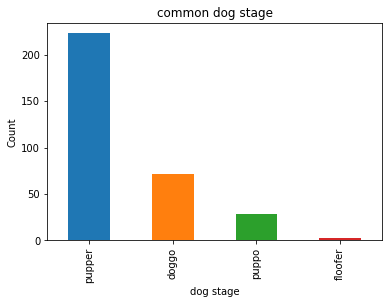

In [274]:
clean_df.dog_stage.value_counts()[:10].plot('bar')
plt.title('common dog stage')
plt.xlabel('dog stage')
plt.ylabel('Count');

### Common dog Names

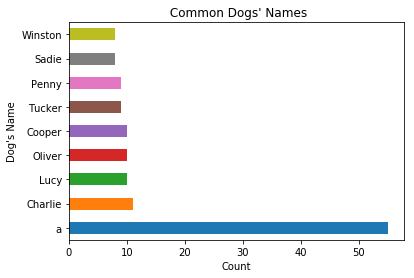

In [275]:
clean_df.name.value_counts().sort_values(ascending =False)[2:10].plot('barh')
plt.title(" Common Dogs' Names")
plt.xlabel('Count')
plt.ylabel("Dog's Name");

### Relation between Retweets count& Favourite count

Text(0,0.5,'Favourite count')

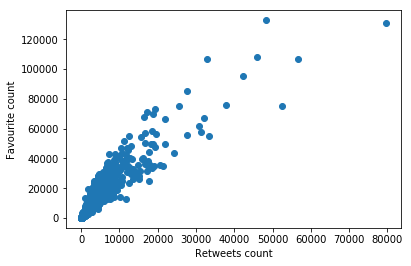

In [276]:
plt.scatter(clean_df.retweet_count,clean_df.favorite_count)
plt.xlabel('Retweets count')
plt.ylabel('Favourite count')

## Top retweeted & favorite dog

In [277]:
#top reweete
photo =clean_df.loc[clean_df['retweet_count'].sort_values(ascending =False).index[0]]
r = photo['jpg_url']
Image(url=r)

In [278]:
#top favorit
photo =clean_df.loc[clean_df['favorite_count'].sort_values(ascending =False).index[0]]
r = photo['jpg_url']
Image(url=r)